In [7]:
import env
import acquire
import prepare
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
items_df = pd.read_csv("items.csv")
stores_df = pd.read_csv("stores.csv")
sales_df = pd.read_csv("sales.csv")

In [4]:
zach_df = acquire.merge_zach_dataframes(items_df, stores_df, sales_df)

In [5]:
zach_df = prepare.prepare_zach_df(zach_df)

In [8]:
zach_df.shape

(913000, 16)

In [9]:
zach_df.head()

,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,1,10.92
2013-01-01,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,1,1,218.40
2013-01-01,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,1,1,125.55
2013-01-01,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,54.0,213643,8,15000 San Pedro Ave,San Antonio,TX,78232,1,1,453.60
2013-01-01,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,35.0,215469,9,735 SW Military Dr,San Antonio,TX,78221,1,1,294.00


In [16]:
daily_total_sales = zach_df.groupby('sale_date').sales_total.sum()

# Splitting the data

## Visual the target to decide how to split

In [24]:
daily_total_sales = pd.DataFrame(daily_total_sales)

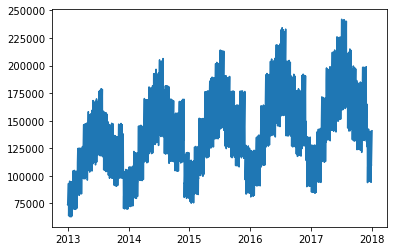

In [29]:
plt.plot(daily_total_sales.index, daily_total_sales.sales_total)

### Percentage-based

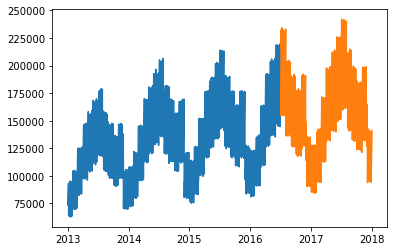

In [30]:
# 70/30 train/test split
train_size = .70
n = daily_total_sales.shape[0]
test_start_index = round(train_size * n)

train = daily_total_sales[:test_start_index]
test = daily_total_sales[test_start_index:]

plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)
plt.show()

### Human-based

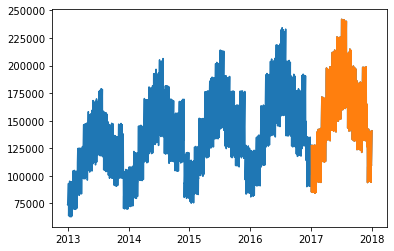

In [32]:
# Save 2017-2018 for test
train = daily_total_sales[:'2017']
test = daily_total_sales['2017']

plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)
plt.show()

## Visualizations

In [33]:
y = train.sales_total
y.head()

sale_date
2013-01-01    73844.01
2013-01-02    73570.58
2013-01-03    78169.48
2013-01-04    84467.73
2013-01-05    87621.85
Name: sales_total, dtype: float64

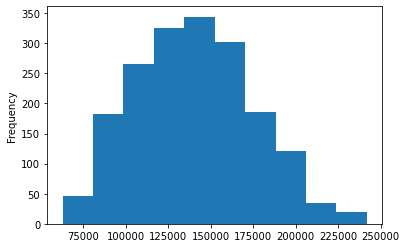

In [36]:
y.plot.hist()
plt.show()

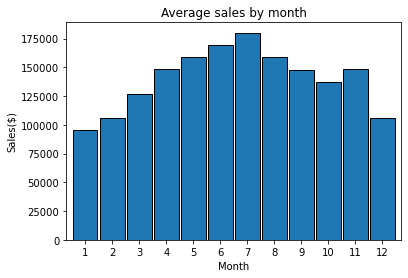

In [38]:
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average sales by month', xlabel='Month', ylabel='Sales($)')
plt.show()

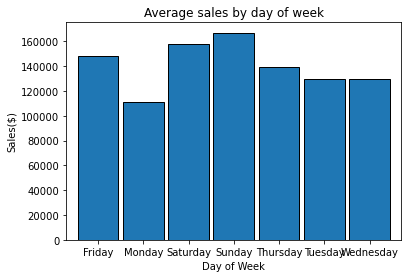

In [40]:
ax = y.groupby(y.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average sales by day of week', xlabel='Day of Week', ylabel='Sales($)')
plt.show()

## Visualize the target over time

<AxesSubplot:xlabel='sale_date'>

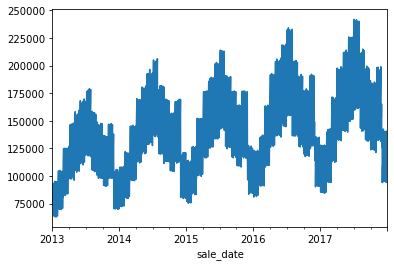

In [47]:
y.plot()

<AxesSubplot:title={'center':'Weekly average'}, xlabel='sale_date'>

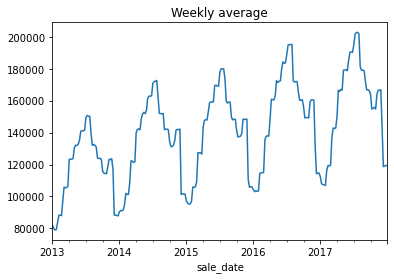

In [50]:
y.resample('W').mean().plot(title="Weekly average")

<AxesSubplot:title={'center':'Monthly average'}, xlabel='sale_date'>

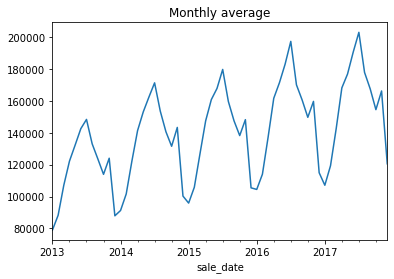

In [49]:
y.resample('M').mean().plot(title="Monthly average")

<AxesSubplot:title={'center':'Quarterly average'}, xlabel='sale_date'>

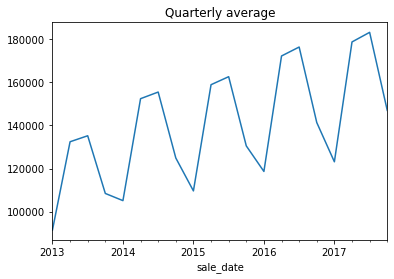

In [51]:
y.resample('Q').mean().plot(title="Quarterly average")

<AxesSubplot:title={'center':'Yearly average'}, xlabel='sale_date'>

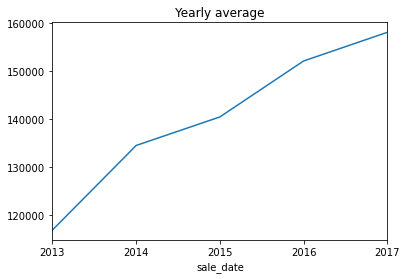

In [52]:
y.resample('A').mean().plot(title="Yearly average")

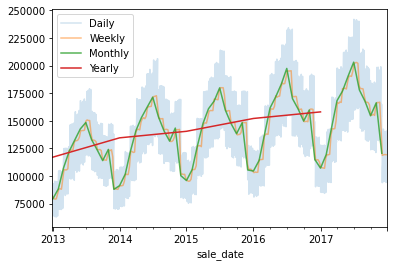

In [54]:
y.plot(alpha=.2, label='Daily')
y.resample('W').mean().plot(alpha=.5, label='Weekly')
y.resample('M').mean().plot(alpha=.8, label='Monthly')
y.resample('A').mean().plot(label='Yearly')
plt.legend()

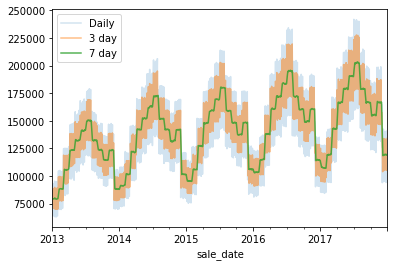

In [56]:
y.plot(alpha=.2, label='Daily')
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(7).mean().plot(alpha=.8, label='7 day')
plt.legend()

## Visualize change over time

<AxesSubplot:title={'center':'Average week-to-week change in sales dollars'}, xlabel='sale_date'>

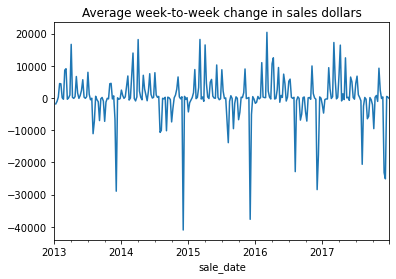

In [57]:
y.resample('W').mean().diff().plot(title='Average week-to-week change in sales dollars')

<AxesSubplot:title={'center':'Average month-to-month change in sales dollars'}, xlabel='sale_date'>

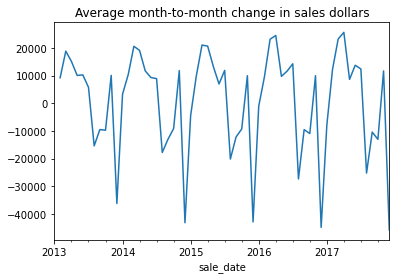

In [58]:
y.resample('M').mean().diff().plot(title='Average month-to-month change in sales dollars')

## Seasonal plot

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='sale_date'>

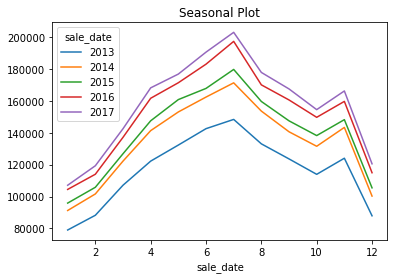

In [63]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')

## Seasonal Subseries Plot

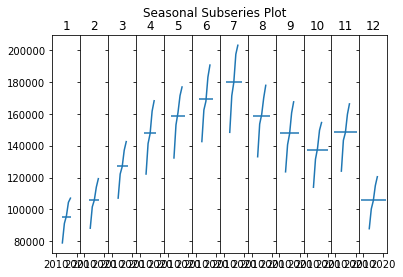

In [64]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

## Lag plot

Text(0.5, 1.0, 'Lag plot with lag=1')

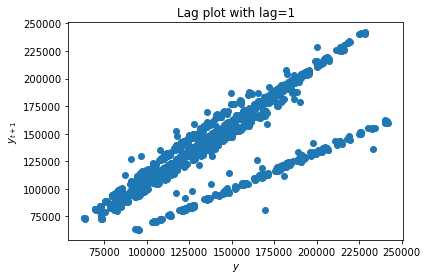

In [65]:
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')

[Text(0.5, 0, 't'), Text(0, 0.5, 't + 1')]

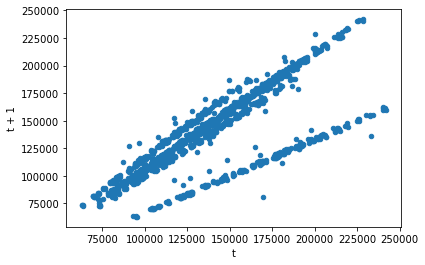

In [68]:
train['y(t + 1)'] = train.sales_total.shift(-1)
ax = train.plot.scatter(x='sales_total', y='y(t + 1)')
ax.set(xlabel='t', ylabel='t + 1')

In [69]:
del train['y(t + 1)']

In [70]:
train.columns

Index(['sales_total'], dtype='object')

,this_week,the_next_week
sale_date,,
2013-01-06,81794.583333,79990.601429
2013-01-13,79990.601429,78973.360000
2013-01-20,78973.360000,79272.691429
2013-01-27,79272.691429,83792.507143
2013-02-03,83792.507143,88227.801429
...,...,...
2017-12-03,143735.021429,118656.734286
2017-12-10,118656.734286,119181.612857
2017-12-17,119181.612857,119434.030000


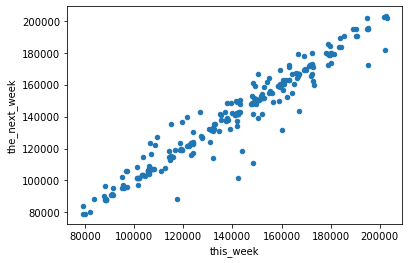

In [71]:
weekly = train.resample('W').mean()
weekly['the_next_week'] = weekly.sales_total.shift(-1)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week')
weekly

,this_week,12_weeks_out
sale_date,,
2013-01-06,81794.583333,106501.331429
2013-01-13,79990.601429,123193.640000
2013-01-20,78973.360000,123430.685714
2013-01-27,79272.691429,123345.042857
2013-02-03,83792.507143,123791.114286
...,...,...
2017-12-03,143735.021429,NaN
2017-12-10,118656.734286,NaN
2017-12-17,119181.612857,NaN


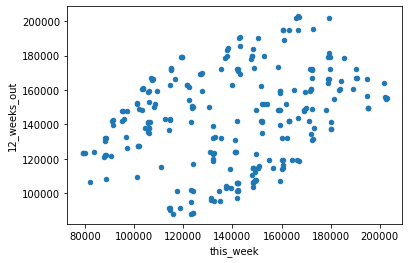

In [72]:
weekly = train.resample('W').mean()
weekly['12_weeks_out'] = weekly.sales_total.shift(-12)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='12_weeks_out')
weekly

,this_week,half_a_year_later
sale_date,,
2013-01-06,81794.583333,149604.697143
2013-01-13,79990.601429,150789.424286
2013-01-20,78973.360000,150282.567143
2013-01-27,79272.691429,150242.265714
2013-02-03,83792.507143,139188.128571
...,...,...
2017-12-03,143735.021429,NaN
2017-12-10,118656.734286,NaN
2017-12-17,119181.612857,NaN


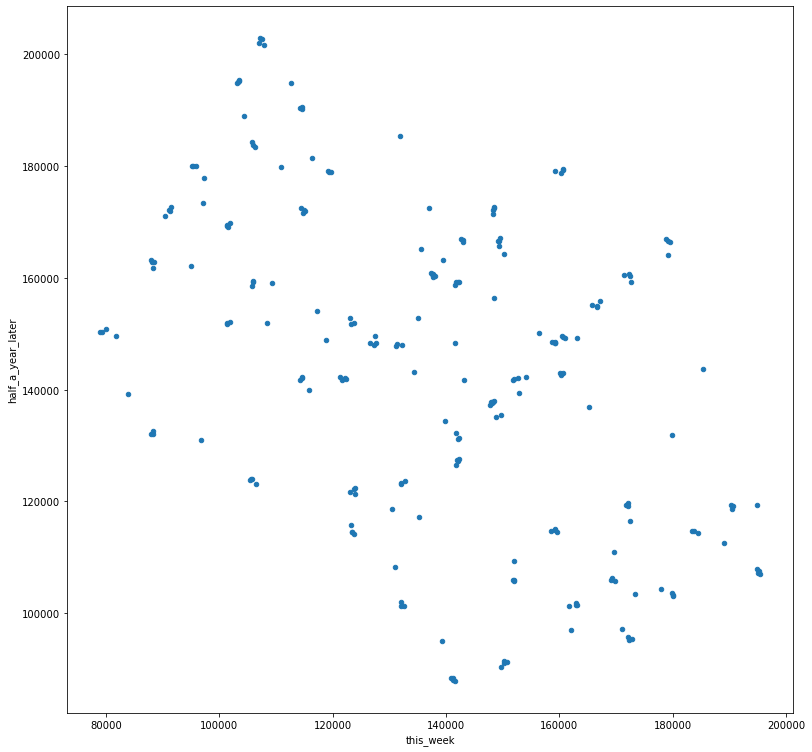

In [75]:
weekly = train.resample('W').mean()
weekly['half_a_year_later'] = weekly.sales_total.shift(-26)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='half_a_year_later', figsize=(13, 13))
weekly

,this_week,year_later
sale_date,,
2013-01-06,81794.583333,90373.531429
2013-01-13,79990.601429,91200.402857
2013-01-20,78973.360000,91116.268571
2013-01-27,79272.691429,91510.905714
2013-02-03,83792.507143,95024.768571
...,...,...
2017-12-03,143735.021429,NaN
2017-12-10,118656.734286,NaN
2017-12-17,119181.612857,NaN


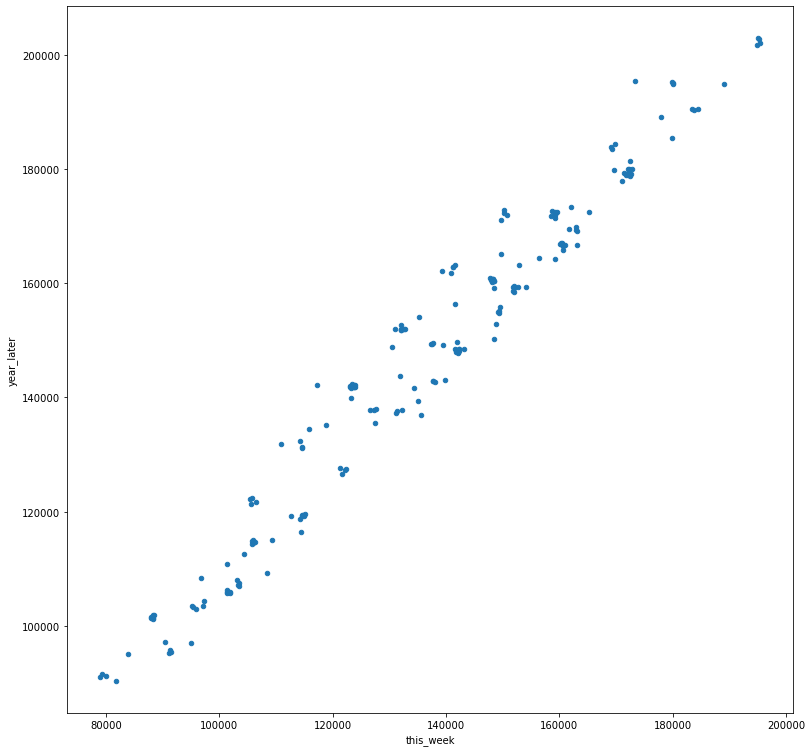

In [77]:
weekly = train.resample('W').mean()
weekly['year_later'] = weekly.sales_total.shift(-52)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='year_later', figsize=(13, 13))
weekly

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 52)'>

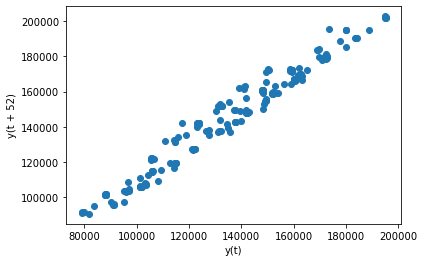

In [79]:
pd.plotting.lag_plot(train.sales_total.resample('W').mean(), lag=52)

### Autocorrelation plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

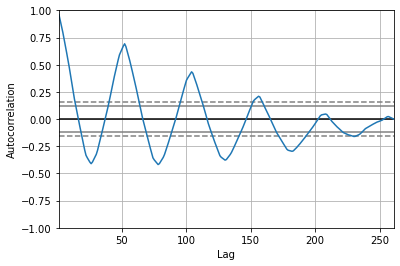

In [81]:
pd.plotting.autocorrelation_plot(train.sales_total.resample('W').mean())

In [82]:
y = train.sales_total.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
sale_date,,,,
2013-01-06,81794.583333,NaN,-39546.987151,NaN
2013-01-13,79990.601429,NaN,-41411.171921,NaN
2013-01-20,78973.360000,NaN,-41813.217384,NaN
2013-01-27,79272.691429,NaN,-42047.601887,NaN
2013-02-03,83792.507143,NaN,-41060.050472,NaN


<AxesSubplot:xlabel='sale_date'>

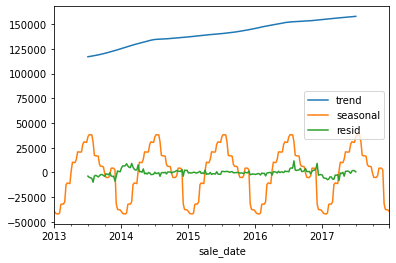

In [83]:
decomposition.iloc[:, 1:].plot()

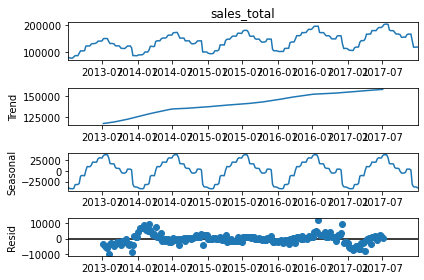

In [84]:
result.plot()
None

## Categories over time 

In [86]:
train['sales_bin'] = pd.qcut(train.sales_total, 4, labels=["quartile_1", "quartile_2", "quartile_3", "quartile_4"])
train.groupby('sales_bin').mean()

,sales_total
sales_bin,
quartile_1,97332.398950
quartile_2,127136.302851
quartile_3,151482.712500
quartile_4,185841.329912


Text(0, 0.5, '% of days in the month')

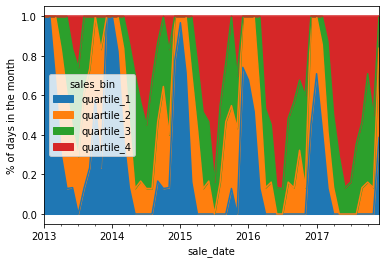

In [89]:
(train.groupby('sales_bin')
 .resample('M')
 .size()
 .unstack(0)
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.area()
)
plt.ylabel('% of days in the month')

## strftime

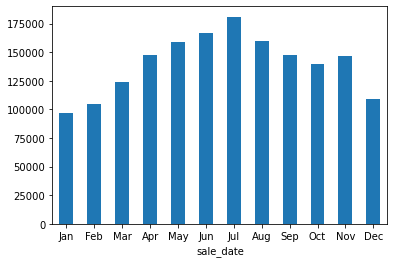

In [91]:
ax = y.groupby(y.index.strftime('%m-%b')).mean().plot.bar()
ax.set_xticklabels([t.get_text()[3:] for t in ax.get_xticklabels()], rotation=0)
None

### Matplotlib Dates 

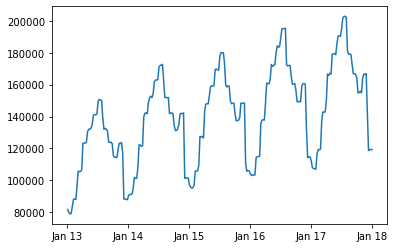

In [92]:
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots()

weekly = y.resample('W').mean()

ax.plot(weekly.index, weekly)

ax.xaxis.set_major_formatter(DateFormatter('%b %y'))